In [2]:
import pandas as pd
import numpy as np
import utils
from toxicity import get_toxicity_detoxify
import importlib
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [3]:
importlib.reload(utils)

<module 'utils' from '/Users/naman/Documents/GeorgiaTech/CS/6471/CSS-6471/code/utils.py'>

In [4]:
PATH = '../data/'
file_1 = 'early_tweets.csv'
file_2 = 'later_tweets.csv'
downloads=False
exists = True

In [5]:
merged = utils.get_merged(PATH + file_1, PATH + file_2, exists=exists)
eng_merge = utils.get_english(merged, exists=exists)

if not exists:
    eng_merge.to_csv('../data/2020toxicity.csv', index=False)

In [6]:
merged_years = utils.merge_years('../data/2020toxicity.csv', '../data/2022toxicity.csv', exists=exists)

In [8]:
toxicity = get_toxicity_detoxify(merged_years, save_interval=1000, exists=exists)

In [9]:
sentiment = utils.get_sentiment(toxicity, exists=exists, downloads=downloads)

In [10]:
parsed = utils.parse_tweets(sentiment, exists=exists, downloads=downloads)

In [11]:
parsed.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,date,text,retweets,favorites,toxicity,severe_toxicity,identity_attack,sentiment,parsed_tweets,hashtags
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45.0,39.0,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,0.0,0.0,0.001040,0.000002,0.000127,0.4019,Let party begin,['#Tokyo2020']
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235.0,5.0,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,0.0,0.0,0.000654,0.000001,0.000096,0.5994,Congratulations,['#Tokyo2020']
2,1418889399081656321,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103976.0,2724.0,2021-07-24 11:02:49,Q3 🇨🇦 1-4 🇩🇪\n\nGreen card for Canada's captai...,0.0,0.0,0.000433,0.000001,0.000075,0.0000,Q3 🇨🇦 1-4 🇩🇪Green card Canada's captain Scott ...,"['#Tokyo2020', '#CANvGER']"
3,1418889398171566081,Franz Halili,"Bacoor, Calabarzon",From the suburbs of Metro Manila\n\nHost of Ta...,2019-04-18 14:41:04,142.0,295.0,2021-07-24 11:02:48,GREAT FIRST ROUND ON THE RINGS!! #LabaPilipina...,0.0,0.0,0.002840,0.000005,0.000213,0.7519,GREAT FIRST ROUND ON THE RINGS!!,"['#LabaPilipinas', '#TeamPhilippines', '#Tokyo..."
4,1418889395416051717,Happy💛,Lusaka,I love Jesus Christ | Music | Kids | Athletics...,2010-12-04 13:50:09,1143.0,592.0,2021-07-24 11:02:48,Gymnastics ❤️ #Tokyo2020,0.0,0.0,0.000901,0.000002,0.000118,0.0000,Gymnastics ❤️,['#Tokyo2020']


In [13]:
counts = {}
for item in parsed['date']:
    key = item[:7]
    counts[key] = counts.get(key, 0) + 1
counts

{'2021-07': 219881, '2021-08': 10362, '2022-02': 165218}

In [14]:
sns.set_theme(style="darkgrid")
sns.set(font_scale = 2)

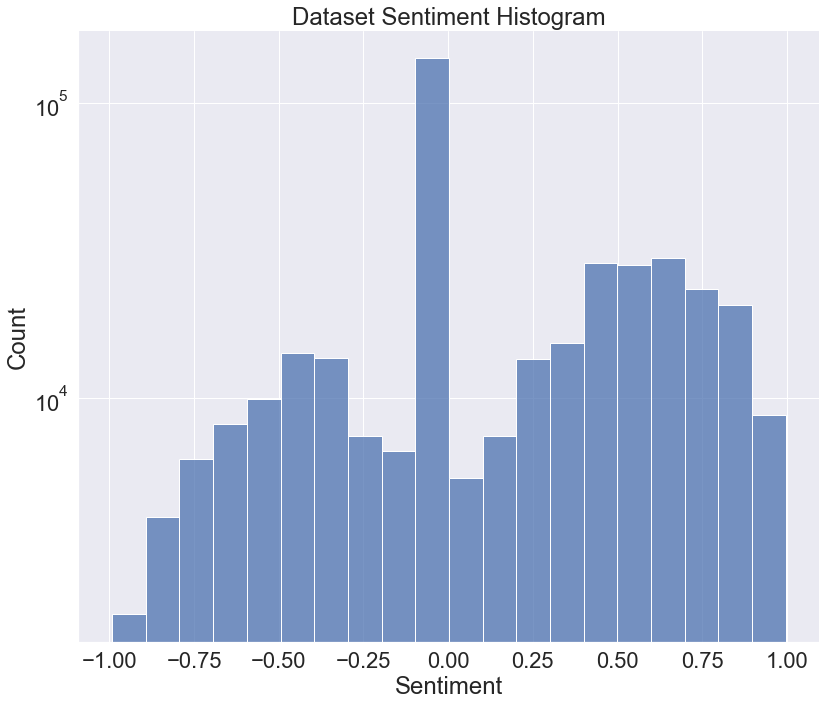

In [18]:
g = sns.displot(parsed, x="sentiment", log_scale=(False, True), bins=20, height=10, aspect=1.2).set(title="Dataset Sentiment Histogram")
g.set_axis_labels("Sentiment", 'Count')
# plt.savefig('../figures/sentimentHist.png', pad_inches=0, dpi=100)

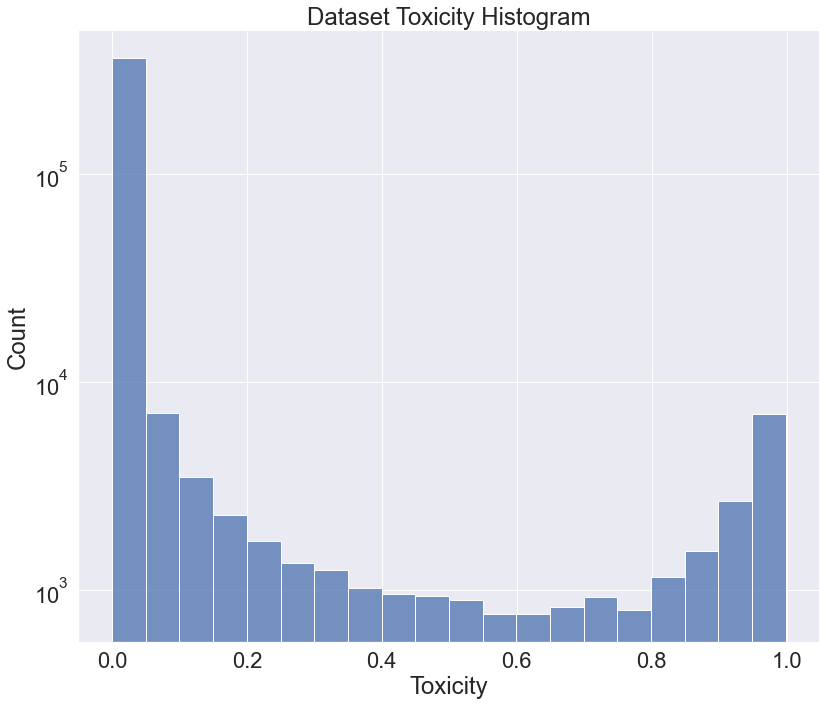

In [ ]:
g = sns.displot(parsed, x="toxicity", log_scale=(False, True), bins=20, height=10, aspect=1.2).set(title="Dataset Toxicity Histogram")
g.set_axis_labels("Toxicity", 'Count')
# plt.savefig('../figures/toxicityHist.png', pad_inches=0, dpi=100)

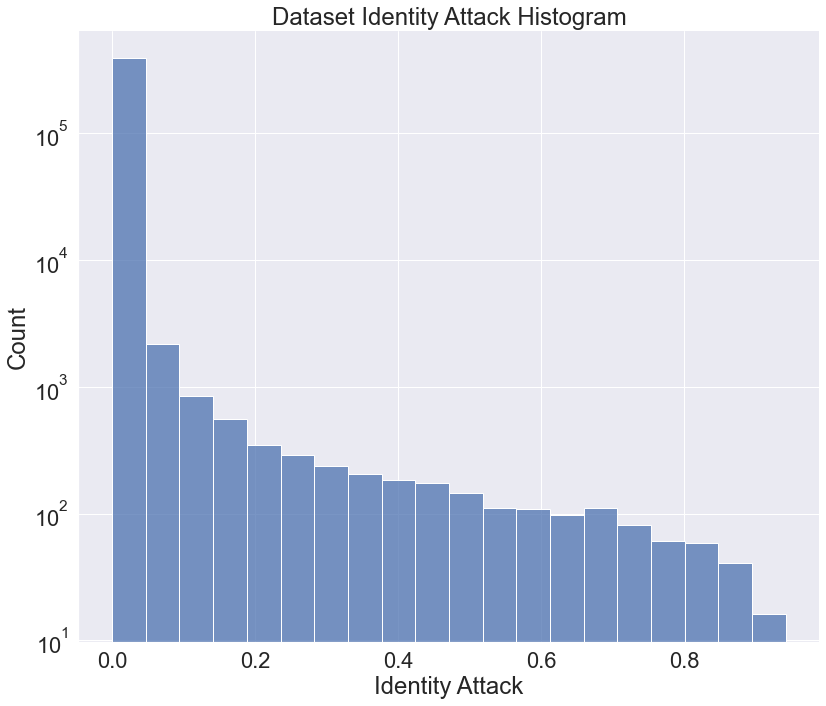

In [32]:
g = sns.displot(parsed, x="identity_attack", log_scale=(False, True), bins=20, height=10, aspect=1.2).set(title="Dataset Identity Attack Histogram")
g.set_axis_labels("Identity Attack", 'Count')
# plt.savefig('../figures/toxicityHist.png', pad_inches=0, dpi=100)

/Users/naman/anaconda3/envs/6471/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  """
/Users/naman/anaconda3/envs/6471/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


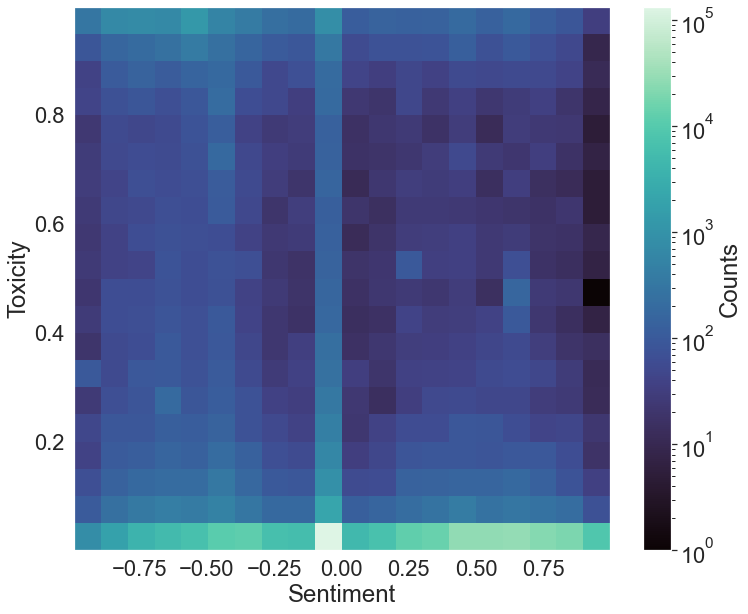

In [ ]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
h = ax.hist2d(parsed['sentiment'], parsed['toxicity'], bins=20, cmap=sns.color_palette("mako", as_cmap=True), norm=LogNorm())
ax.set_ylabel('Toxicity')
ax.set_xlabel('Sentiment')
fig.colorbar(h[3], ax=ax, label='Counts')
plt.savefig('../figures/sentimentToxicityHist.png', pad_inches=0, dpi=100)
plt.show()

In [ ]:
# Word frequency analysis
words = pd.Series(' '.join(parsed['parsed_tweets']).lower().split()).value_counts()[:100]
for i in range(len(words)):
    if words.index[i] not in nltk.corpus.stopwords.words('english'):
        print(words.index[i], words.values[i])

In [18]:
o2020 = parsed[parsed['olympics'] == '2020']
o2022 = parsed[parsed['olympics'] == '2022']

In [44]:
mannwhitneyu(o2020['sentiment'], o2022['sentiment'], alternative='two-sided')

MannwhitneyuResult(statistic=18746242783.5, pvalue=2.729751914148314e-15)

In [48]:
mannwhitneyu(o2020['sentiment'], o2022['sentiment'], alternative='less')

MannwhitneyuResult(statistic=18746242783.5, pvalue=1.364875957074157e-15)

In [46]:
mannwhitneyu(o2020['toxicity'], o2022['toxicity'], alternative='two-sided')

MannwhitneyuResult(statistic=19491924145.5, pvalue=1.663967080321687e-40)

In [47]:
mannwhitneyu(o2020['toxicity'], o2022['toxicity'], alternative='greater')

MannwhitneyuResult(statistic=19491924145.5, pvalue=8.319835401608435e-41)

In [43]:
mannwhitneyu(o2022['identity_attack'], o2020['identity_attack'], alternative='two-sided')

MannwhitneyuResult(statistic=19475830311.0, pvalue=6.630539805962999e-38)

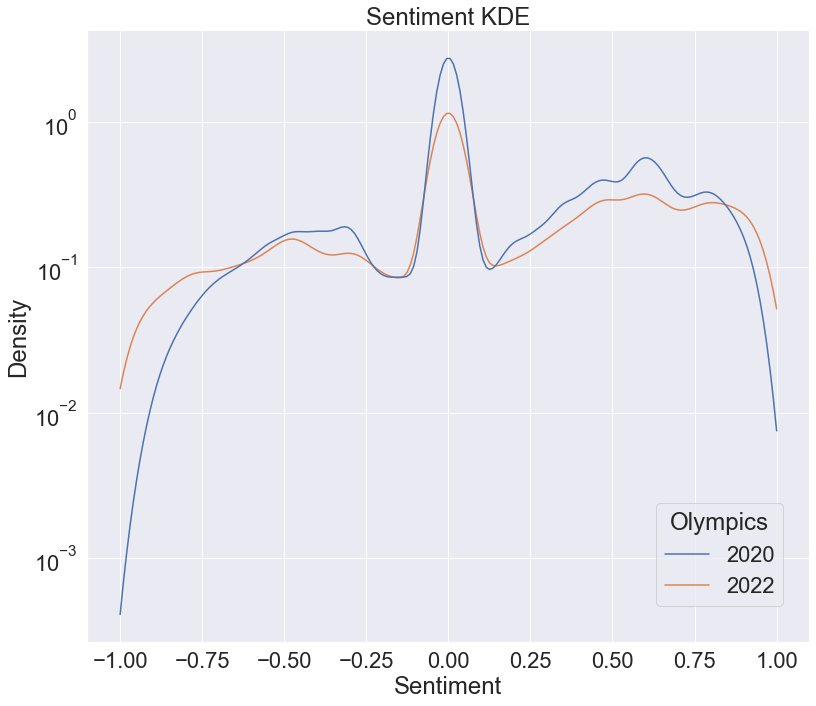

In [79]:
g = sns.displot(parsed, x="sentiment", hue='olympics', kind='kde', clip=(-1.0, 1.0), log_scale=(False, True), height=10, aspect=1.2).set(title="Sentiment KDE")
sns.move_legend(g, "lower right", bbox_to_anchor=(0.82, 0.15), title='Olympics', frameon=True)
g.set_axis_labels("Sentiment", 'Density')

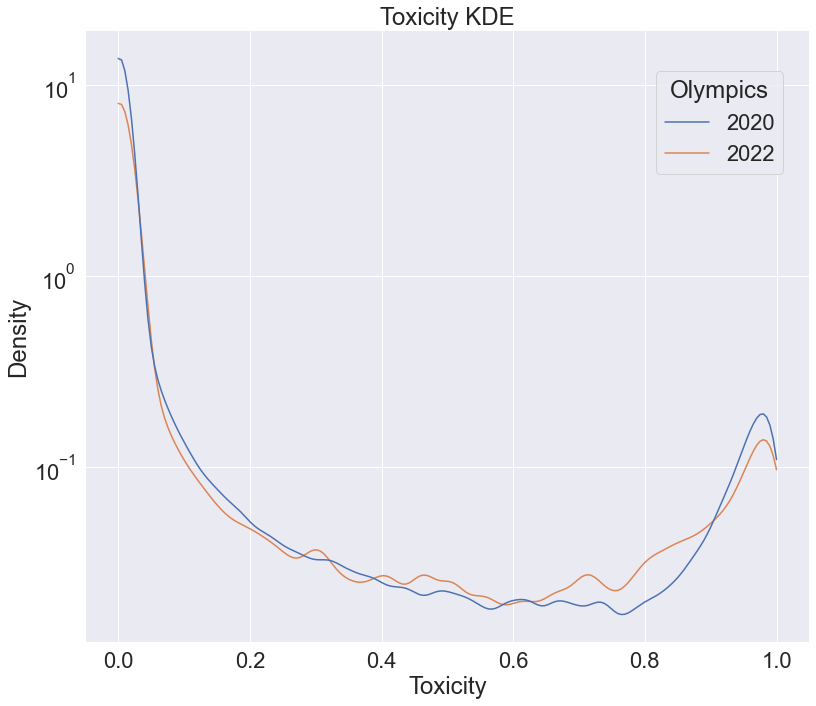

In [28]:
# g = sns.displot(clean_dates, x="toxicity", hue='olympics', kind='kde', log_scale=(False, True), height=10, aspect=1.2).set(title="Tokyo 2020 Toxicity Histogram", ylim=(0, 100000))
g = sns.displot(parsed, x="toxicity", hue='olympics', kind='kde', log_scale=(False, True), clip=(0.0, 1.0), height=10, aspect=1.2, common_norm=True).set(title="Toxicity KDE")
sns.move_legend(g, "lower right", bbox_to_anchor=(0.82, 0.75), title='Olympics', frameon=True)
g.set_axis_labels("Toxicity", 'Density')


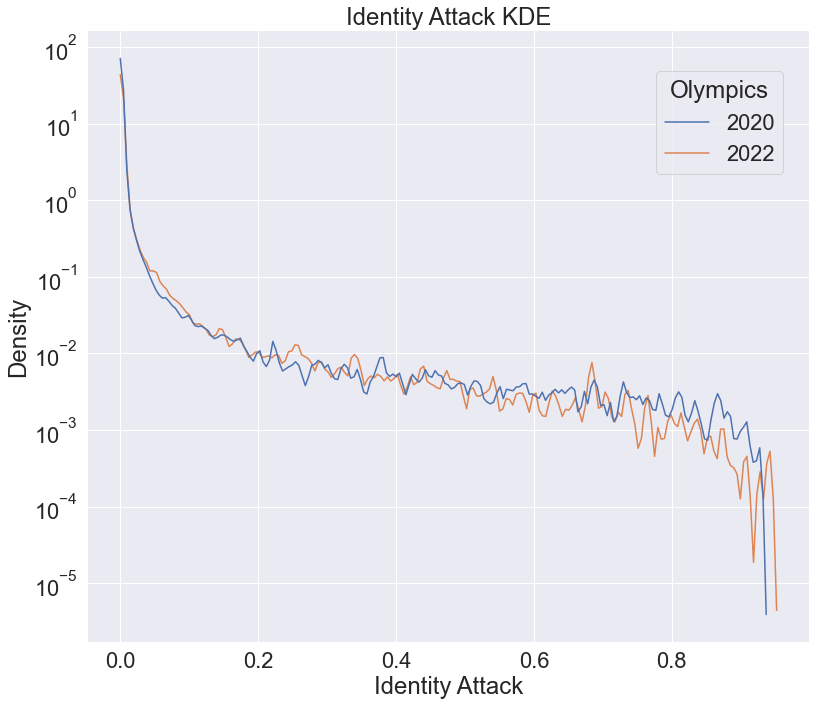

In [40]:
# g = sns.displot(clean_dates, x="toxicity", hue='olympics', kind='kde', log_scale=(False, True), height=10, aspect=1.2).set(title="Tokyo 2020 Toxicity Histogram", ylim=(0, 100000))
g = sns.displot(parsed, x="identity_attack", hue='olympics', kind='kde', log_scale=(False, True), clip=(0.0, 1.0), height=10, aspect=1.2, common_norm=True).set(title="Identity Attack KDE")
sns.move_legend(g, "lower right", bbox_to_anchor=(0.82, 0.75), title='Olympics', frameon=True)
g.set_axis_labels("Identity Attack", 'Density')

/Users/naman/anaconda3/envs/6471/lib/python3.7/site-packages/seaborn/axisgrid.py:38: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


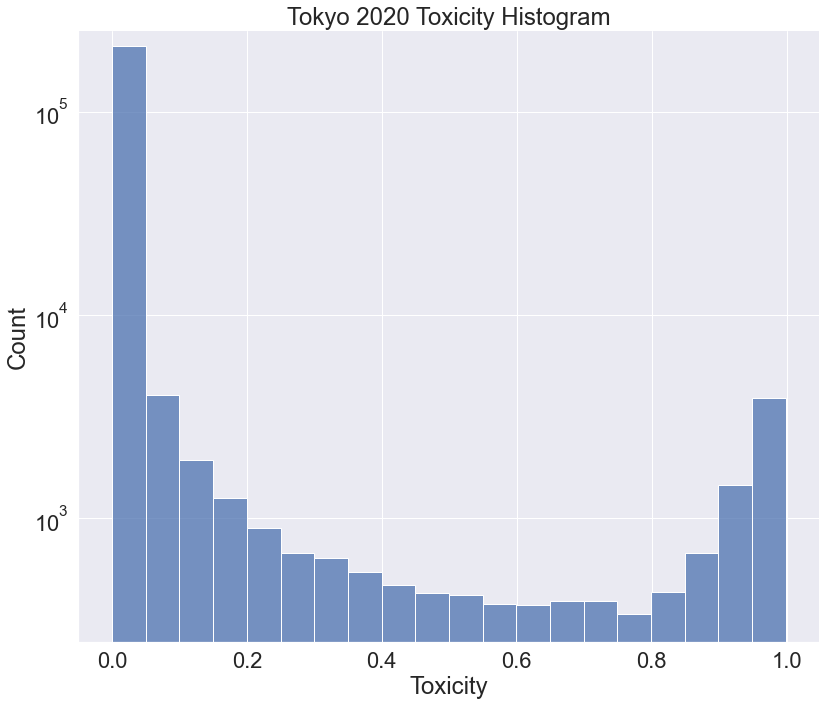

In [63]:
g = sns.displot(o2020, x="toxicity", log_scale=(False, True), bins=20, height=10, aspect=1.2).set(title="Tokyo 2020 Toxicity Histogram", ylim=(0, 250000))
g.set_axis_labels("Toxicity", 'Count')


/Users/naman/anaconda3/envs/6471/lib/python3.7/site-packages/seaborn/axisgrid.py:38: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


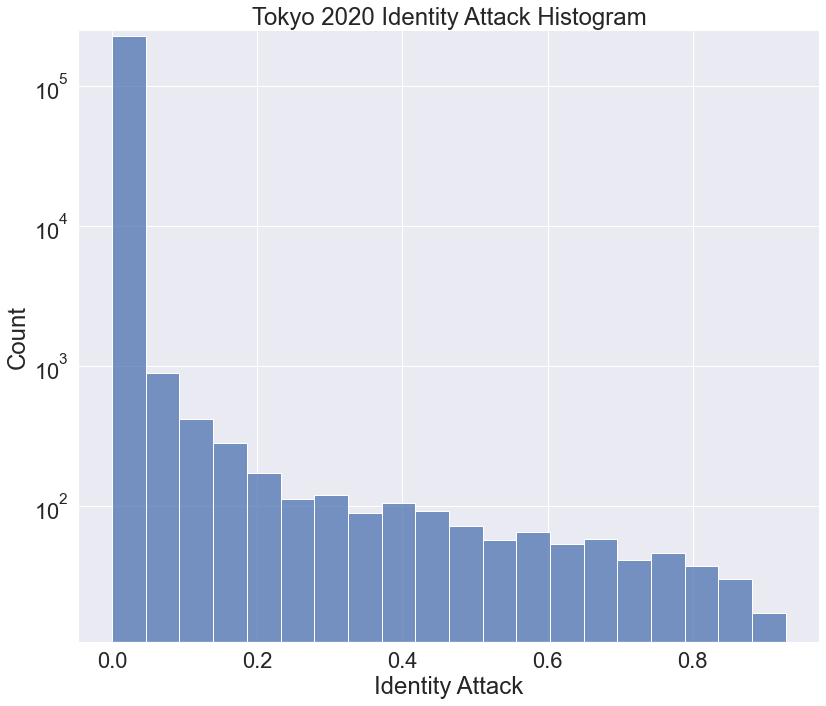

In [65]:
g = sns.displot(o2020, x="identity_attack", log_scale=(False, True), bins=20, height=10, aspect=1.2).set(title="Tokyo 2020 Identity Attack Histogram", ylim=(0, 250000))
g.set_axis_labels("Identity Attack", 'Count')

/Users/naman/anaconda3/envs/6471/lib/python3.7/site-packages/seaborn/axisgrid.py:38: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


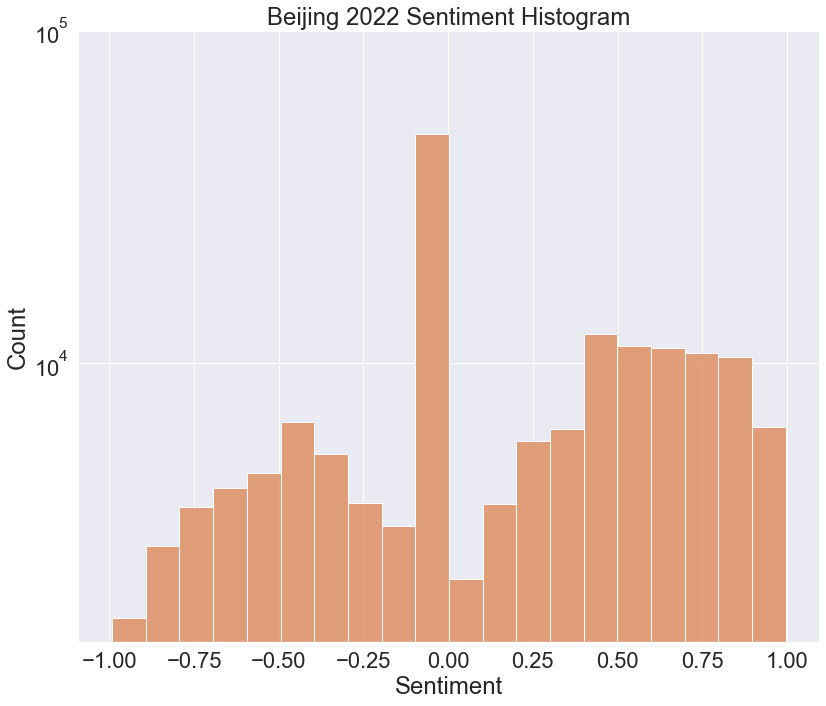

In [66]:
g = sns.displot(o2022, x="sentiment", log_scale=(False, True), bins=20, height=10, aspect=1.2, color=sns.color_palette()[1]).set(title="Beijing 2022 Sentiment Histogram", ylim=(0, 100000))
g.set_axis_labels("Sentiment", 'Count')

/Users/naman/anaconda3/envs/6471/lib/python3.7/site-packages/seaborn/axisgrid.py:38: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


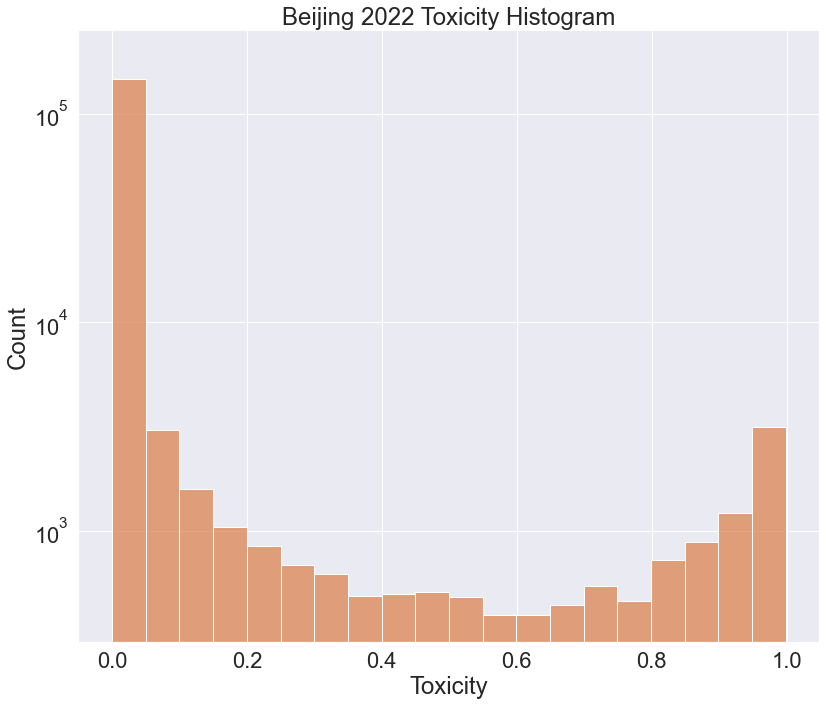

In [64]:
g = sns.displot(o2022, x="toxicity", log_scale=(False, True), bins=20, height=10, aspect=1.2, color=sns.color_palette()[1]).set(title="Beijing 2022 Toxicity Histogram", ylim=(0, 250000))
g.set_axis_labels("Toxicity", 'Count')

/Users/naman/anaconda3/envs/6471/lib/python3.7/site-packages/seaborn/axisgrid.py:38: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


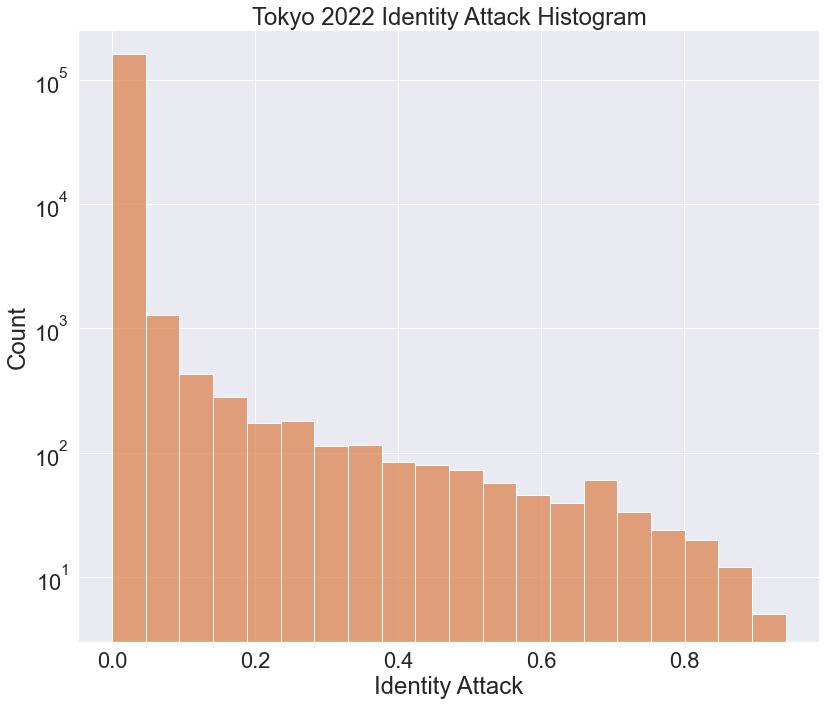

In [67]:
g = sns.displot(o2022, x="identity_attack", log_scale=(False, True), bins=20, height=10, aspect=1.2, color=sns.color_palette()[1]).set(title="Tokyo 2022 Identity Attack Histogram", ylim=(0, 250000))
g.set_axis_labels("Identity Attack", 'Count')